In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, os

from scipy.optimize import curve_fit

In [14]:
def list_files_in_directory(directory):
    try:
        # Get list of files and directories
        items = os.listdir(directory)
        
        # Filter out directories
        files = [item for item in items if os.path.isfile(os.path.join(directory, item))]
        
        # Sort files alphabetically
        files.sort()
        
        return files
    except Exception as e:
        return str(e)

# Specify the directory
directory_path = '/home/gaurav/Projects/DMRG_HK/output/clust_out/'

# List files in the directory
files = list_files_in_directory(directory_path)

# Print the files
for file in files:
    print(file)


2D_OHK_DMRG_20240717-191359.pkl


In [32]:
with open(directory_path+files[0], "rb") as input_file:
    data_dict = pickle.load(input_file)

In [33]:
GS_list = data_dict['GS_list']
Lx_list = data_dict['Lx_list'] 
Ly_list = data_dict['Ly_list'] 
U = data_dict['U']
t = data_dict['t']
mu = data_dict['mu']
chi_max = data_dict['chi_max']
sweeps = data_dict['sweeps'] 
duration = data_dict['duration']
k_num = data_dict['k_num']

In [34]:
print(Lx_list, Ly_list)

[2] [2, 4, 6, 8]


Text(0.5, 0, 'Lx')

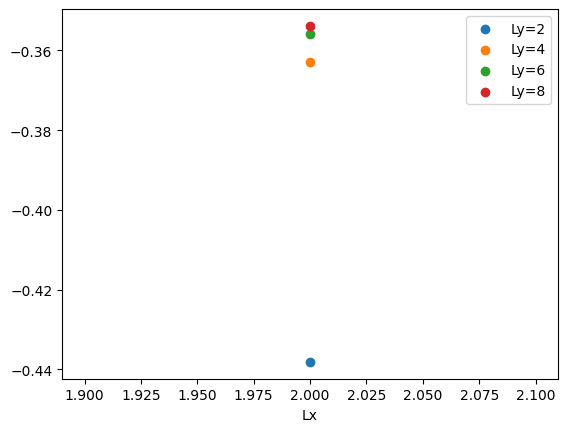

In [35]:
for j, Ly in enumerate(Ly_list):
    plt.scatter(Lx_list, GS_list[:, j], label="Ly="+str(Ly))
    
plt.legend()
plt.xlabel("Lx")


Text(0.5, 0, 'Lx')

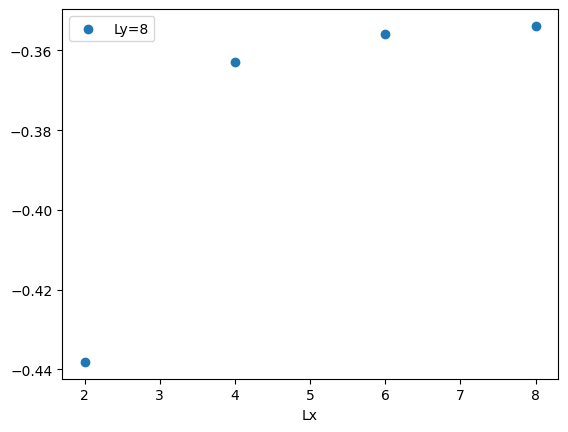

In [36]:
for j, Lx in enumerate(Lx_list):
    plt.scatter(Ly_list, GS_list[j, :], label="Ly="+str(Ly))
    
plt.legend()
plt.xlabel("Lx")


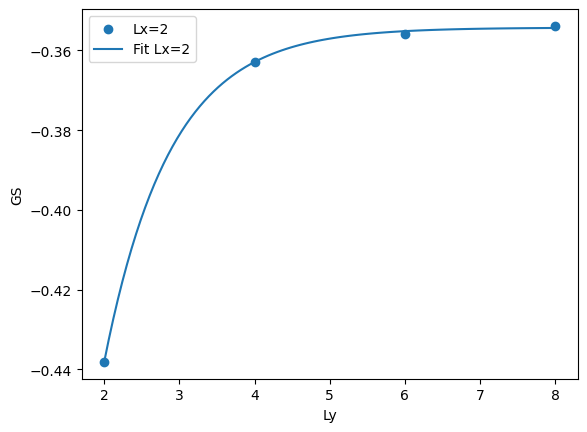

Parameters for Lx=2: A=-0.8148248790098818, B=1.1369553623239859, C=-0.3542777035238798


In [37]:


# Define the exponential function to fit
def exp_func(x, A, B, C):
    return A * np.exp(-B * x) + C

# Fit each dataset
params = []
for j, Lx in enumerate(Lx_list):
    popt, pcov = curve_fit(exp_func, Ly_list[:], GS_list[j, :])
    params.append(popt)

    # Plot original data
    plt.scatter(Ly_list, GS_list[j, :], label="Lx=" + str(Lx))
    
    # Plot fitted curve
    x_fit = np.linspace(min(Ly_list), max(Ly_list), 100)
    y_fit = exp_func(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=f'Fit Lx={Lx}')

plt.legend()
plt.xlabel("Ly")
plt.ylabel("GS")
plt.show()

# Print the fitted parameters for each dataset
for i, param in enumerate(params):
    print(f"Parameters for Lx={Lx_list[i]}: A={param[0]}, B={param[1]}, C={param[2]}")


0.99
0.992
0.994
0.996
0.998
1.0


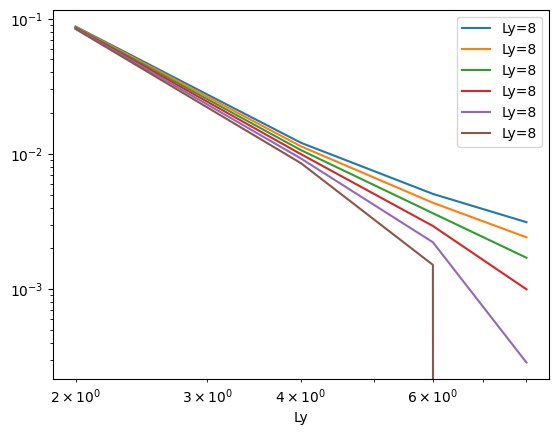

In [38]:
for j, Lx in enumerate(Lx_list):
    for tune in np.arange(0.99, 1.00, 0.002):
        plt.plot(Ly_list, -GS_list[j, :]-0.3542777035238798*tune, label="Ly="+str(Ly))
        print(tune)
    
plt.legend()
plt.xlabel("Ly")
plt.yscale('log')
plt.xscale('log')

Parameters for Lx=2: A=0.7056282923775846, B=-3.0432745549703255


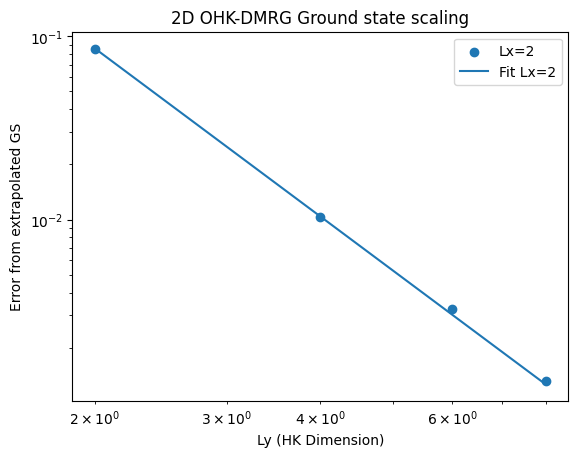

In [39]:



# Define the power law function to fit
def power_law(x, A, B):
    return A * np.power(x, B)

# Offset value (replace with the actual value you want to use)
offset = 0.3550182864563605*0.993

# Fit each dataset
params = []
for j, Lx in enumerate(Lx_list):
    y_data = -GS_list[j, :] - offset
    popt, pcov = curve_fit(power_law, Ly_list[:], y_data[:])
    params.append(popt)

    # Plot original data
    plt.scatter(Ly_list, y_data, label="Lx=" + str(Lx))
    
    # Plot fitted curve
    x_fit = np.linspace(min(Ly_list), max(Ly_list), 100)
    y_fit = power_law(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=f'Fit Lx={Lx}')

plt.legend()
plt.xlabel("Ly (HK Dimension)")
plt.ylabel("Error from extrapolated GS")
plt.yscale('log')
plt.xscale('log')
# Print the fitted parameters for each dataset
for i, param in enumerate(params):
    print(f"Parameters for Lx={Lx_list[i]}: A={param[0]}, B={param[1]}")

plt.title("2D OHK-DMRG Ground state scaling")
plt.show()


In [42]:
offset

0.352533158451166

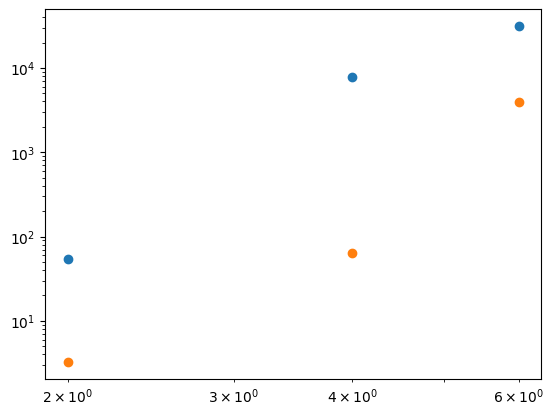

In [13]:
Lx_list_Ly4 = np.array([2, 4, 6])
run_time_Ly4 = np.array([53.44488453865051, 7900.839780330658, 31346.970111370087])

Lx_list_Ly2 = np.array([2, 4, 6])
run_time_Ly2 = np.array([3.2389798164367676, 64.0700433254242, 3937.4373519420624])

plt.scatter(Lx_list_Ly4, run_time_Ly4)
plt.scatter(Lx_list_Ly2, run_time_Ly2)
plt.yscale('log')
plt.xscale('log')

In [14]:
popt, pcov = curve_fit(power_law, Lx_list_Ly2, run_time_Ly2)
popt

array([4.91766520e-05, 1.01567076e+01])

In [15]:
power_law(8, *popt)/3600

20.317831701829036

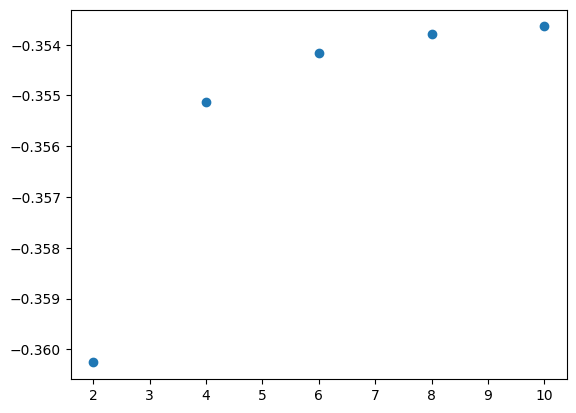

In [28]:
Lx_list=np.array([10, 8, 6, 4, 2])
OHK_GSE = np.array([-70.72822156448028, -56.6073454083164, -42.50006514057866, -28.410852512064114, -14.410309227718233])/10/2


plt.scatter(Lx_list, OHK_GSE/Lx_values)

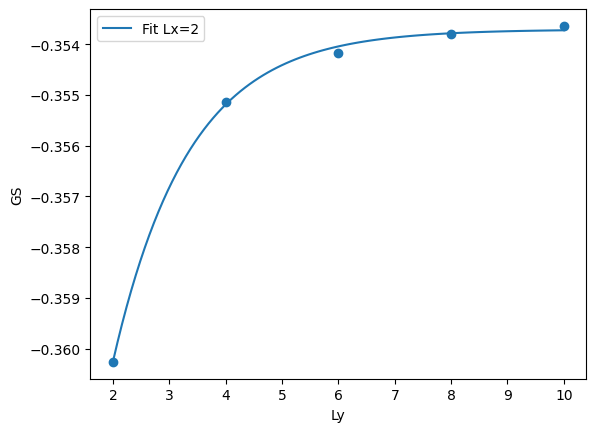

Parameters for Ly=2: A=-0.028938466492609102, B=0.743470703945934, C=-0.3537099651083929


In [29]:
params = []
popt, pcov = curve_fit(exp_func, Lx_list[:], OHK_GSE[:]/Lx_list[:])
params.append(popt)

# Plot original data
plt.scatter(Lx_list, OHK_GSE/Lx_list)

# Plot fitted curve
x_fit = np.linspace(min(Lx_list), max(Lx_list), 100)
y_fit = exp_func(x_fit, *popt)
plt.plot(x_fit, y_fit, label=f'Fit Lx={Lx}')

plt.legend()
plt.xlabel("Ly")
plt.ylabel("GS")
plt.show()

# Print the fitted parameters for each dataset
for i, param in enumerate(params):
    print(f"Parameters for Ly={Ly_list[i]}: A={param[0]}, B={param[1]}, C={param[2]}")

0.99
0.991
0.992
0.993
0.994
0.995
0.996
0.997
0.998
0.999
1.0


/tmp/ipykernel_878346/3257126048.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


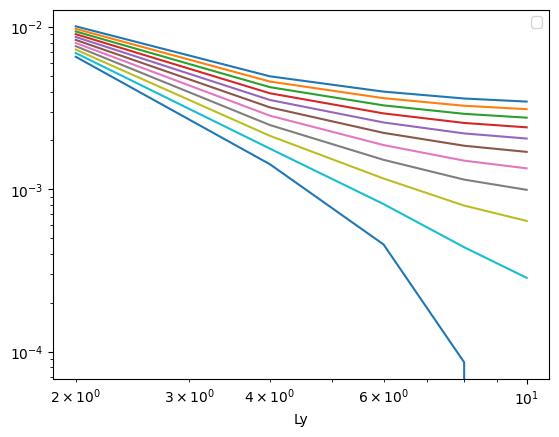

In [31]:
GS_list = OHK_GSE/Lx_list


for tune in np.arange(0.99, 1.00, 0.001):
    plt.plot(Lx_list, -GS_list[:]-0.3537099651083929*tune)
    print(tune)
    
plt.legend()
plt.xlabel("Ly")
plt.yscale('log')
plt.xscale('log')

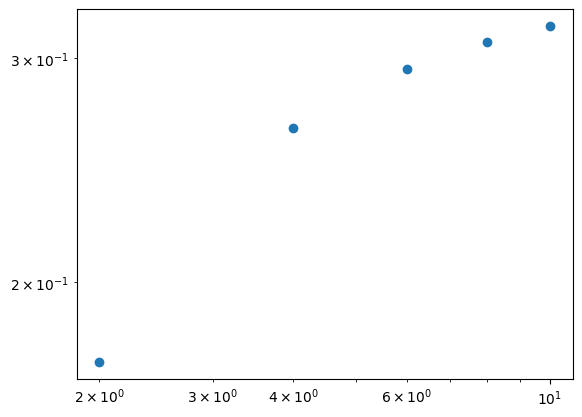

In [36]:
plt.scatter(Lx_list, 0.3537099651083929*0.999+GS_list/Lx_list)
plt.xscale('log')
plt.yscale('log')

In [23]:
Ly_list = np.array([4, 6, 8, 10])
GS_list = np.array([-0.7318515365164155, -0.71238086971011, -0.7161818473035738, -0.7114434380885759])

# Fit each dataset
params = []
popt, pcov = curve_fit(exp_func, Ly_list[:], GS_list[:])
params.append(popt)

# Plot original data
plt.scatter(Ly_list, GS_list[:], label="Lx=" + str(Lx))

# Plot fitted curve
x_fit = np.linspace(min(Ly_list), max(Ly_list), 100)
y_fit = exp_func(x_fit, *popt)
plt.plot(x_fit, y_fit, label=f'Fit Lx={Lx}')

plt.legend()
plt.xlabel("Ly")
plt.ylabel("GS")
plt.show()

# Print the fitted parameters for each dataset
for i, param in enumerate(params):
    print(f"Parameters: A={param[0]}, B={param[1]}, C={param[2]}")


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

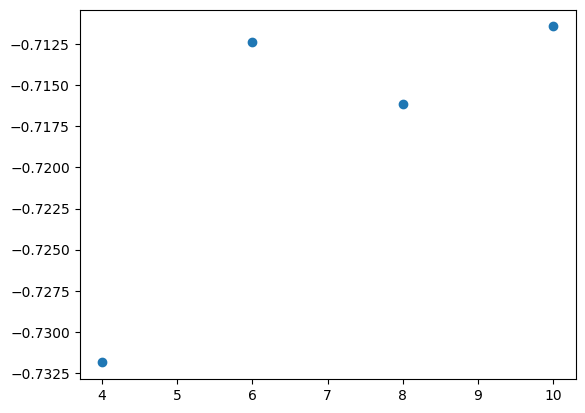

In [13]:
plt.scatter(Ly_list, GS_list[:], label="Lx=" + str(Lx))

In [24]:
GS_list/2

array([-0.36592577, -0.35619043, -0.35809092, -0.35572172])